# Import Libraries :

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, roc_auc_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
import warnings

warnings.filterwarnings('ignore')


In [14]:
df = pd.read_csv('/kaggle/input/rraian1/Rainfall (1).csv')
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [15]:
df.isnull().sum()

day                       0
pressure                  0
maxtemp                   0
temparature               0
mintemp                   0
dewpoint                  0
humidity                  0
cloud                     0
rainfall                  0
sunshine                  0
         winddirection    1
windspeed                 1
dtype: int64

In [16]:

df.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [17]:
for col in df.columns:

  # Checking if the column contains
  # any null values
  if df[col].isnull().sum() > 0:
    val = df[col].mean()
    df[col] = df[col].fillna(val)

df.isnull().sum().sum()

0

In [18]:

df.replace({'yes':1, 'no':0}, inplace=True)

In [19]:
df.drop(['maxtemp', 'mintemp'], axis=1, inplace=True)

In [20]:
features = df.drop(['day', 'rainfall'], axis=1)
target = df.rainfall

In [21]:
X_train, X_val, Y_train, Y_val = train_test_split(features,
                                      target,
                                      test_size=0.2,
                                      stratify=target,
                                      random_state=2)

# As the data was highly imbalanced we will
# balance it by adding repetitive rows of minority class.
ros = RandomOverSampler(sampling_strategy='minority',
                        random_state=22)
X, Y = ros.fit_resample(X_train, Y_train)

# Train and Evaluate Models :

In [22]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [23]:
# Define the models with updated parameters
models = [
    KNeighborsClassifier(n_neighbors=5, weights='distance'), 
    RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_split=20, min_samples_leaf=10),
    GaussianNB(),
    SVC(probability=True, C=1.0, kernel='linear')  # Optionally adjust C for SVC
]


# Train and evaluate each model
for model in models:
    model.fit(X, Y)
    print(f'{model.__class__.__name__} : ')
    
    train_accuracy = cross_val_score(model, X, Y, cv=5, scoring='roc_auc').mean() * 100
    print('Training Accuracy  : {:.2f}%'.format(train_accuracy))

    val_preds = model.predict_proba(X_val)
    val_accuracy = metrics.roc_auc_score(Y_val, val_preds[:, 1]) * 100
    print('Validation Accuracy : {:.2f}%'.format(val_accuracy))
    print()

KNeighborsClassifier : 
Training Accuracy  : 95.19%
Validation Accuracy : 83.04%

RandomForestClassifier : 
Training Accuracy  : 90.19%
Validation Accuracy : 87.92%

GaussianNB : 
Training Accuracy  : 87.05%
Validation Accuracy : 90.25%

SVC : 
Training Accuracy  : 87.82%
Validation Accuracy : 88.67%



Confusion Matrix for KNeighborsClassifier:


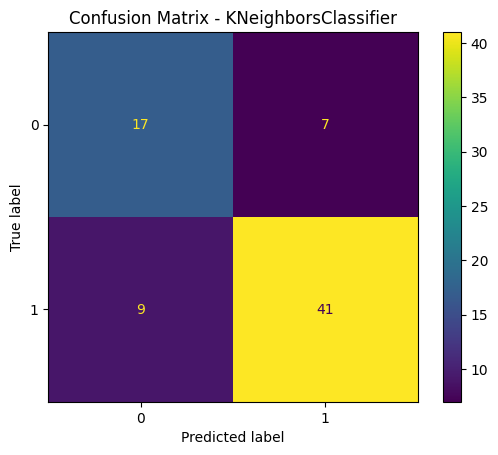

              precision    recall  f1-score   support

           0       0.65      0.71      0.68        24
           1       0.85      0.82      0.84        50

    accuracy                           0.78        74
   macro avg       0.75      0.76      0.76        74
weighted avg       0.79      0.78      0.79        74


Confusion Matrix for RandomForestClassifier:


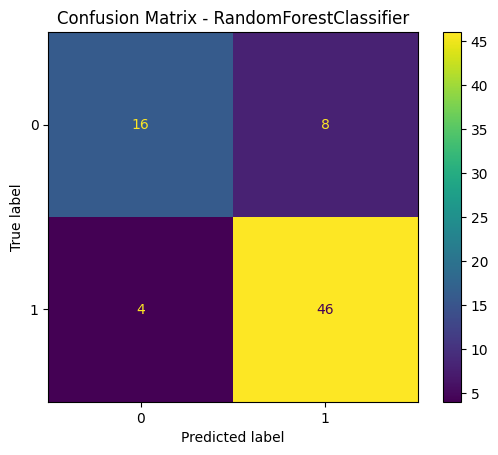

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        24
           1       0.85      0.92      0.88        50

    accuracy                           0.84        74
   macro avg       0.83      0.79      0.81        74
weighted avg       0.84      0.84      0.83        74


Confusion Matrix for GaussianNB:


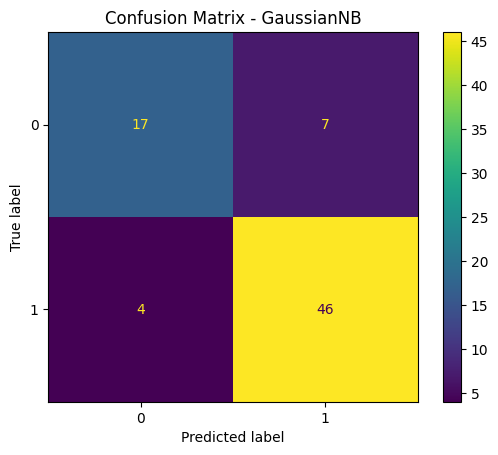

              precision    recall  f1-score   support

           0       0.81      0.71      0.76        24
           1       0.87      0.92      0.89        50

    accuracy                           0.85        74
   macro avg       0.84      0.81      0.82        74
weighted avg       0.85      0.85      0.85        74


Confusion Matrix for SVC:


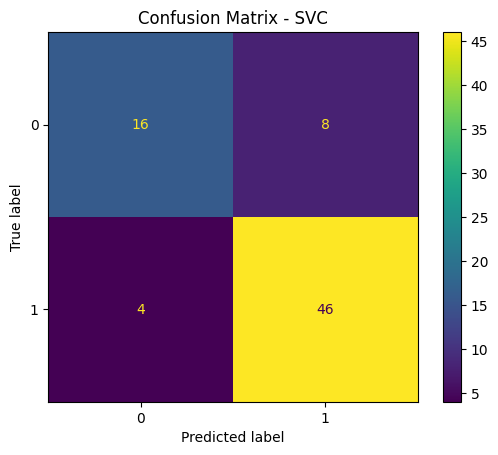

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        24
           1       0.85      0.92      0.88        50

    accuracy                           0.84        74
   macro avg       0.83      0.79      0.81        74
weighted avg       0.84      0.84      0.83        74




In [24]:
# Loop through each model to fit and evaluate
for model in models:
    model.fit(X, Y)  

    # Predict on validation set
    val_preds = model.predict(X_val)

    # Display confusion matrix
    print(f'Confusion Matrix for {model.__class__.__name__}:')
    ConfusionMatrixDisplay.from_estimator(model, X_val, Y_val)
    plt.title(f'Confusion Matrix - {model.__class__.__name__}')
    plt.show()
    
    # Print classification report
    print(metrics.classification_report(Y_val, val_preds))
    print()